# In this project, we take hotel reviews from TripAdivsor and do a sentimental analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


# Reading Data 

In [2]:
df= pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [4]:
df.shape

(20491, 2)

# Some Analysis

<AxesSubplot:xlabel='Rating', ylabel='count'>

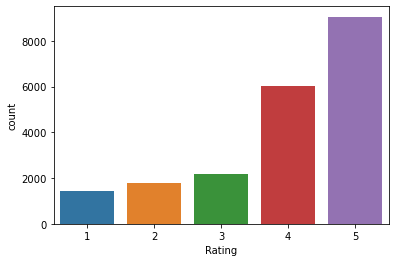

In [5]:
sns.countplot(x= df['Rating'])

In [6]:
df['Word_count']= df['Review'].map(lambda x: len(x.split()))

In [7]:
df.head()

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191


<AxesSubplot:xlabel='Rating', ylabel='Word_count'>

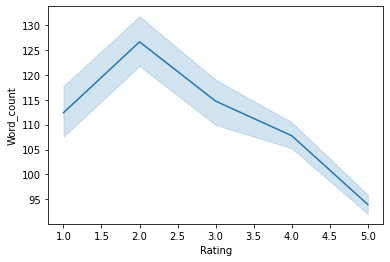

In [8]:
sns.lineplot(x='Rating', data=df, y='Word_count')

**Ingisht**
* Higher Rated Reviews tend to have less words while, lower rated reviews have very high word count

In [9]:
from textblob import TextBlob

In [10]:
def polarity(text):
    blob= TextBlob(text)
    blob.sentiment
    polarity= blob.sentiment.polarity
    
    return polarity

def subjectivity(text):
    blob= TextBlob(text)
    blob.sentiment
    subjectivity= blob.sentiment.subjectivity
    
    return subjectivity

In [11]:
df['Polarity']= df['Review'].apply(polarity)
df['Subjectivity']= df['Review'].apply(subjectivity)
df

,Review,Rating,Word_count,Polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,0.221729,0.508586
20487,great location price view hotel great quick pl...,4,39,0.503704,0.622222
20488,"ok just looks nice modern outside, desk staff ...",2,63,0.171220,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,1,781,0.122573,0.533441


<AxesSubplot:xlabel='Polarity', ylabel='Density'>

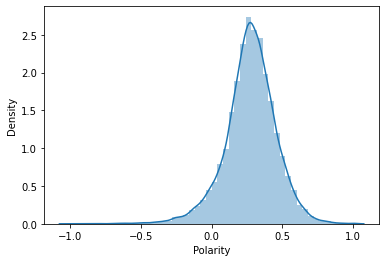

In [12]:
sns.distplot(df['Polarity'])

<AxesSubplot:xlabel='Subjectivity', ylabel='Density'>

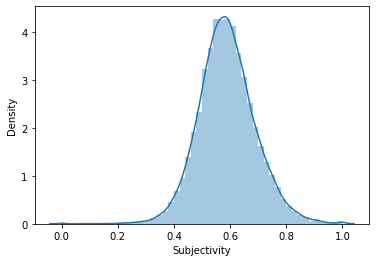

In [13]:
sns.distplot(df['Subjectivity'])

<AxesSubplot:xlabel='Rating', ylabel='Polarity'>

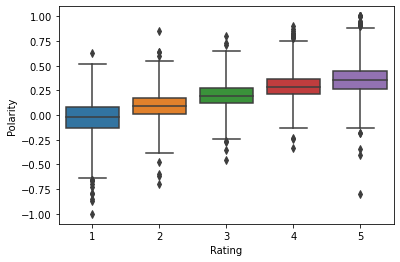

In [14]:
sns.boxplot(x='Rating',y='Polarity', data=df, whis=2.5, fliersize= 5)

<AxesSubplot:xlabel='Rating', ylabel='Subjectivity'>

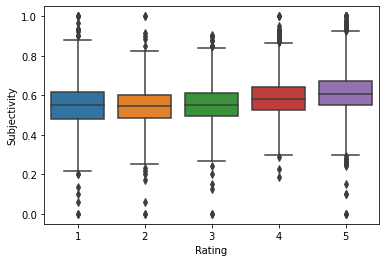

In [15]:
sns.boxplot(x='Rating',y='Subjectivity', data=df, whis=2 )

# Preprocessing the Data using SpaCy

In [16]:
import spacy

In [18]:
nlp= spacy.load('en_core_web_sm')

In [19]:
def preprocess(text):
    lower= text.lower()
    doc= nlp(lower)
    tokens= [token.lemma_ for token in doc ]
    a_lemma= [lemma for lemma in tokens if lemma not in spacy.lang.en.stop_words.STOP_WORDS and lemma.isalpha()]
    return " ".join(a_lemma)

In [20]:
df['Review_new']= df['Review'].apply(preprocess)

In [21]:
df

,Review,Rating,Word_count,Polarity,Subjectivity,Review_new
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,nice hotel expensive parking good deal stay ho...
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,great stay great stay seahawk game awesome dow...
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,0.221729,0.508586,secret time stay charm star beat time stay inc...
20487,great location price view hotel great quick pl...,4,39,0.503704,0.622222,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,63,0.171220,0.524304,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,1,781,0.122573,0.533441,hotel theft ruin vacation hotel open sept gues...


In [22]:
rev= " ".join([review for review in df['Review_new']])
rev[:2000]

'nice hotel expensive parking good deal stay hotel anniversary arrive late evening advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable wake stiff neck high pillow soundproof like hear music room night morning loud bang door open closing hear people talk hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch advantage stay long location great walk distance shopping overall nice experience having pay parking night ok special charge diamond member hilton decide chain shoot anniversary seattle start book suite pay extra website description suite bedroom bathroom standard hotel room print reservation desk thing like tv couch ect desk clerk tell oh mixed suite description kimpton website sorry free breakfast got kid embassy suit sit room bathroom bedroom unlike kimpton suite day stay offer correct false advertising send kimpton preferred guest website email ask failure provide suite adver

# WordCloud of 200 most occuring Words

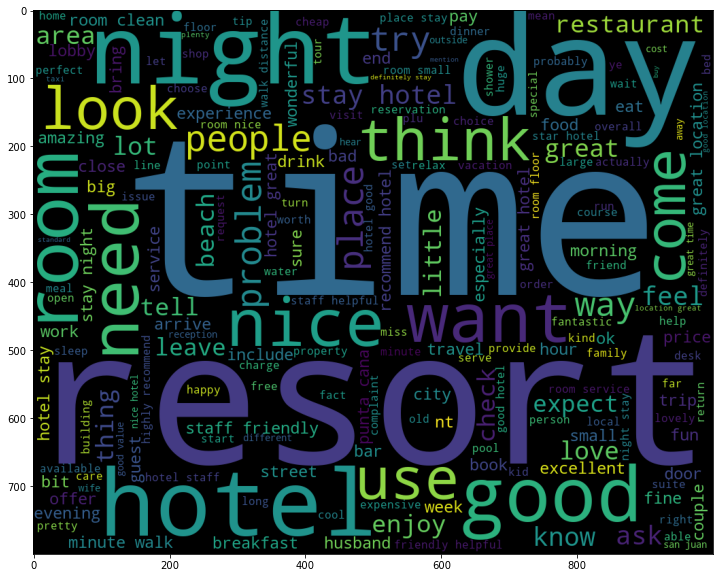

In [23]:
from wordcloud import WordCloud
plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev)
plt.imshow(wc)

In [24]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [25]:
df

,Review,Rating,Word_count,Polarity,Subjectivity,Review_new,Sentiment
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,nice hotel expensive parking good deal stay ho...,1
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,ok special charge diamond member hilton decide...,0
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208,nice room experience hotel monaco seattle good...,1
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,unique great stay wonderful time hotel monaco ...,1
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,great stay great stay seahawk game awesome dow...,1
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,0.221729,0.508586,secret time stay charm star beat time stay inc...,1
20487,great location price view hotel great quick pl...,4,39,0.503704,0.622222,great location price view hotel great quick pl...,1
20488,"ok just looks nice modern outside, desk staff ...",2,63,0.171220,0.524304,ok look nice modern outside desk staff particu...,0
20489,hotel theft ruined vacation hotel opened sept ...,1,781,0.122573,0.533441,hotel theft ruin vacation hotel open sept gues...,0


# Creating our Model

In [33]:
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Rajesh
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [34]:
X= df['Review_new']
y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=0.25, stratify=y)

In [35]:
X_train

3487     excellent resort great time intercontinental h...
127      awesome location helpful staff clean room stay...
14794    robbery worth property steal room middle night...
3842     nice resort husband stay riu taino week weddin...
3390     nice read review leave expect terrible service...
                               ...                        
2118     great stay right airport shuttle run min great...
17804    dream come true planning trip dream punta cana...
4411     excellent hotel great rate hotel hotwire night...
8463     good simply hotel good staff friendly room sma...
18506    married majestic stay sept majestic travel exc...
Name: Review_new, Length: 15368, dtype: object

In [36]:
y_train

3487     1
127      1
14794    0
3842     1
3390     1
        ..
2118     1
17804    1
4411     1
8463     1
18506    1
Name: Sentiment, Length: 15368, dtype: int64

In [37]:
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_transformed= tfidf.fit_transform(X_train.values)
X_test_transformed= tfidf.transform(X_test.values)

In [38]:
X_train_transformed.shape

(15368, 10000)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)
y_pred= rfc.predict(X_test_transformed)

rfc.score(X_test_transformed, y_test)

0.8899082568807339

In [40]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_transformed, y_train)
y_pred= lr.predict(X_test_transformed)

lr.score(X_test_transformed, y_test)

0.924848721452274